In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib.collections import EllipseCollection

from sklearn import datasets
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [3]:
#diabetes_X = diabetes_X[:, np.newaxis, 2]

In [4]:
diabetes_X = pd.DataFrame(diabetes_X)
diabetes_y = pd.DataFrame(diabetes_y)
diabetes_y = diabetes_y.rename(columns={0: "y"})
data_diabetes = pd.concat([diabetes_X,diabetes_y],axis =1)
coorMatrix = data_diabetes.corr()
print(coorMatrix)

          0         1         2         3         4         5         6  \
0  1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
1  0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
2  0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
3  0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
4  0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
5  0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
6 -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
7  0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
8  0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
9  0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   
y  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054 -0.394789   

          7         8         9         y  
0  0.203841  0.270777  0.301731  0.187889  
1  0.332115

In [5]:
def plot_corr_ellipses(data, ax=None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

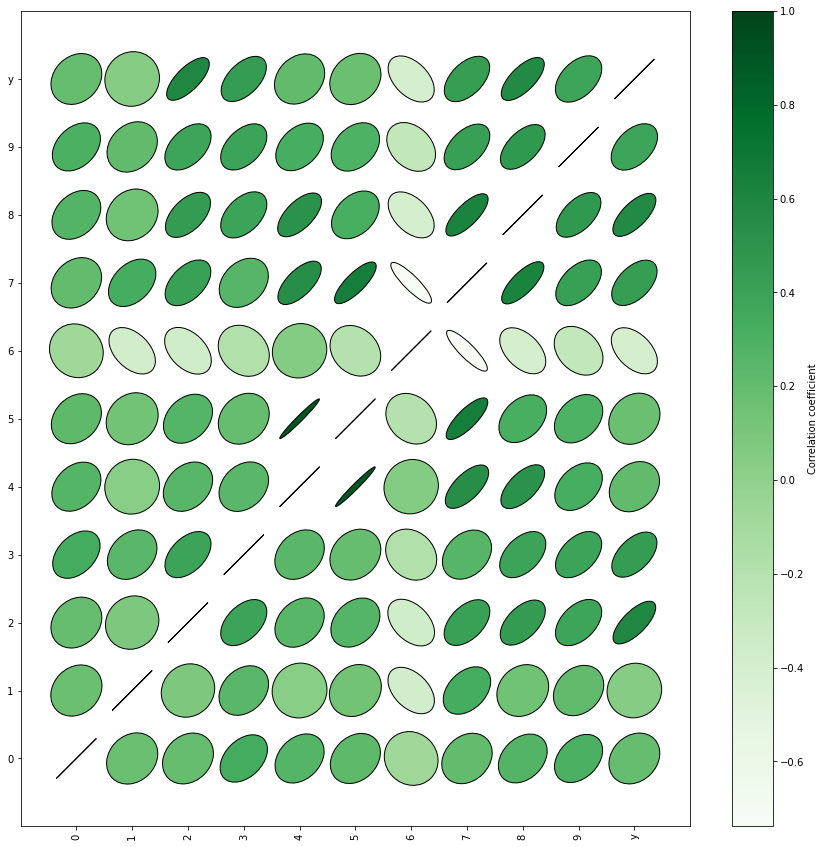

In [6]:
fig, ax = plt.subplots(figsize = (15,15))
m = plot_corr_ellipses(coorMatrix, ax=ax, linewidth=1, cmap='Greens',edgecolors= "black")
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.margins(0.1)

In [7]:
diabetes = datasets.load_diabetes()

data = diabetes.data
target = diabetes.target

print(data.shape)
print(data[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


In [8]:
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]

x_test = diabetes.data[-20:]
#y_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]

LinearRegression

In [9]:
line = linear_model.LinearRegression()
line.fit(x_train, y_train)

y_pred_line = line.predict(x_test)  

print('Coefficients: \n', line.coef_)  

Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [10]:
mean_squared_error(y_test, y_pred_line)


2004.5676026898211

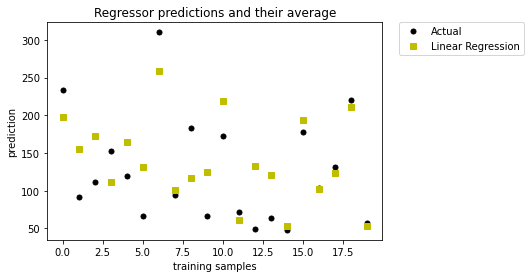

In [11]:
plt.title('Regressor predictions and their average')
plt.plot(y_test, 'k.', ms=10, label='Actual')
plt.plot(y_pred_line, 'ys', label='Linear Regression')

plt.ylabel('prediction')
plt.xlabel('training samples')
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0)

plt.show()

 GradientBoostingRegressor

In [12]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)

y_pred_GBR = GBR.predict(x_test)  

#print('Coefficients: \n', GBR.coef_) 

In [13]:
mean_squared_error(y_test, y_pred_GBR)

2406.4770615461707

RandomForestRegressor

In [14]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

y_pred_RFR = RFR.predict(x_test)  

#print('Coefficients: \n', GBR.coef_) 

In [15]:
mean_squared_error(y_test, y_pred_RFR)


2960.6692350000003

VotingRegressor

In [16]:
ereg = VotingRegressor([('gb', GBR), ('rf', RFR), ('lr', line)])
ereg.fit(x_train, y_train)
y_pred_VR = ereg.predict(x_test)

In [17]:
mean_squared_error(y_test,y_pred_VR)

2279.8074340539292

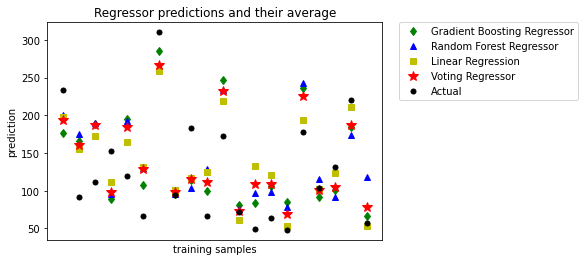

In [18]:
plt.figure()
plt.plot(y_pred_GBR, 'gd', label='Gradient Boosting Regressor')
plt.plot(y_pred_RFR, 'b^', label='Random Forest Regressor')
plt.plot(y_pred_line, 'ys', label='Linear Regression')
plt.plot(y_pred_VR, 'r*', ms=10, label='Voting Regressor')
plt.plot(y_test, 'k.', ms=10, label='Actual')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('prediction')
plt.xlabel('training samples')
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0)
plt.title('Regressor predictions and their average')

plt.show()